# Manifold Learning
Manifold learning refers to dimensionality reduction algorithms which are based on the **manifold hypothesis**
> **Manifold Hypothesis** -- The hypothesis that many high-dimensional data sets that occur in the real world actually lie along low-dimensional manifolds inside that high-dimensional space
## Multidimensional Scaling (MDS)
Aims to preserve pair-wise Euclidean distances between all points while reducing dimensionality.

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [6]:
def gen_manifold(method, n=1500):

    X, color = method(n_samples=n)

    print(f'Shape of X: {X.shape}')
    print(f'Shape of color: {color.shape}')
    print()
    # print("Sample X: \n")

    X = pd.DataFrame(X)
    # print(X.sample(10))

    ax = plt.subplots(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    ax.scatter3D(X[0], X[1], X[2], c=color, cmap='viridis')

    return X, color

Shape of X: (1500, 3)
Shape of color: (1500,)



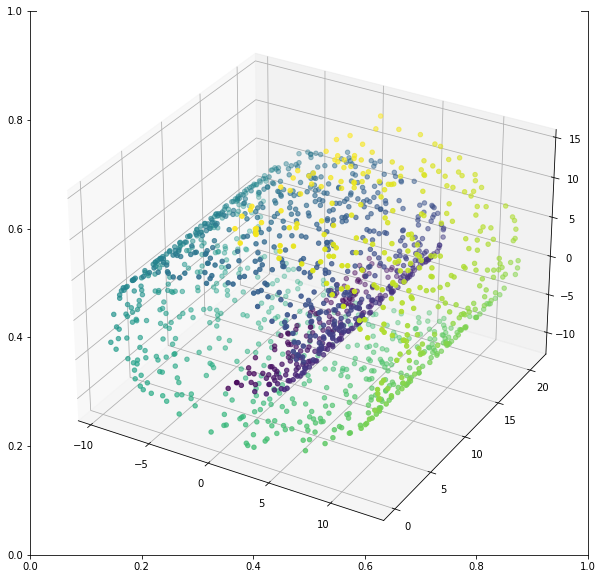

In [29]:
X, color = gen_manifold(datasets._samples_generator.make_swiss_roll)

In [30]:
def apply_manifold_learning(X, method):

    X = method.fit_transform(X)
    print(f'New shape of X: {X.shape}')
    print()
    X = pd.DataFrame(X)

    plt.subplots(figsize=(10, 10))
    plt.axis('equal')

    sns.scatterplot(x=X[0], y=X[1], c=color, cmap='viridis')
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')

    return method

In [31]:
from sklearn.manifold import MDS

New shape of X: (1500, 2)



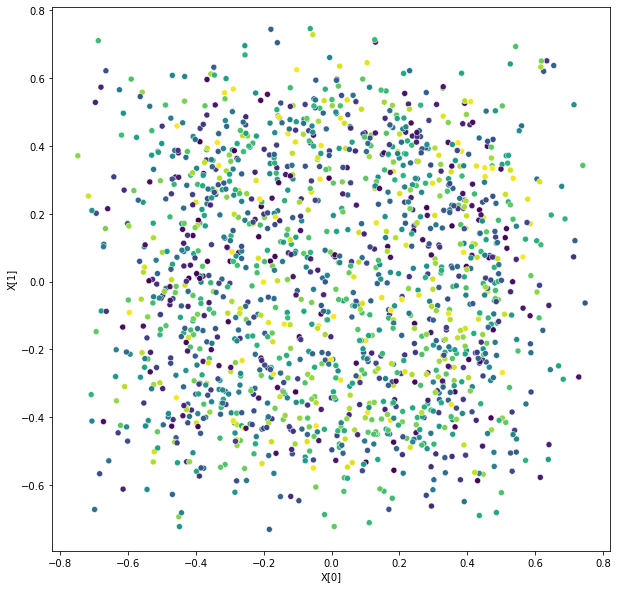

In [32]:
mds = apply_manifold_learning(X, MDS(n_components=2, metric=False)) 
# metric=False is non-parametric MDS. Very similar optimization to isotonic Regression.

New shape of X: (1500, 2)



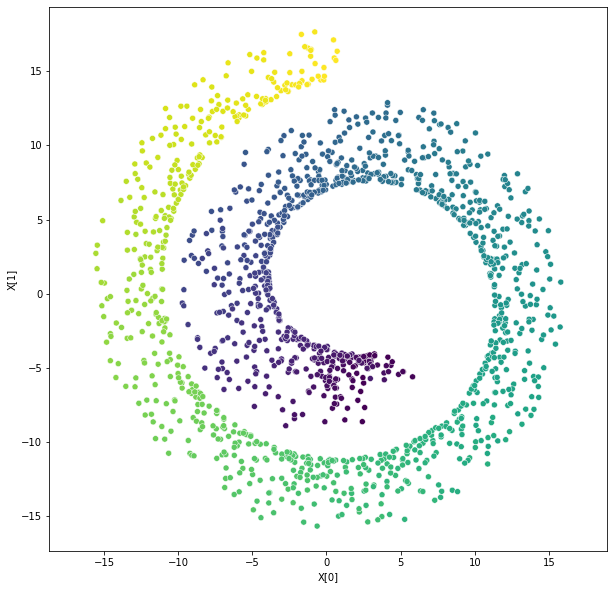

In [33]:
mds = apply_manifold_learning(X, MDS(n_components=2, metric=True)) 
# parametric MDS. tries to minimize the loss function.

## Isomap
Aims to preserve pair-wise Euclidean distances between neighbouring points only
Works out equivalent to preserving geodesic distance between all points

New shape of X: (1500, 2)



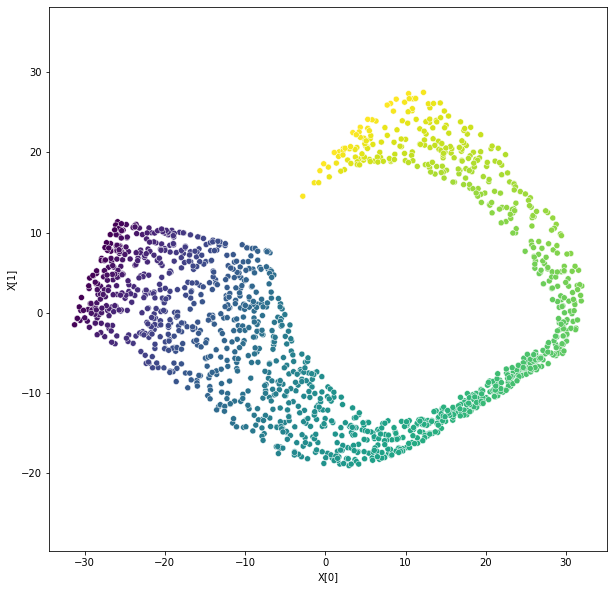

In [34]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_components=2, n_neighbors=15))

## Locally Linear Embedding (LLE)
Expresses each point as centroid (wighted average) of nearest neighbours. Then tries to maintain same weights upon conversion to new dimensions.
3 types of LLEs:
 - Standard
 - Modified
 - Hessian

New shape of X: (1500, 2)



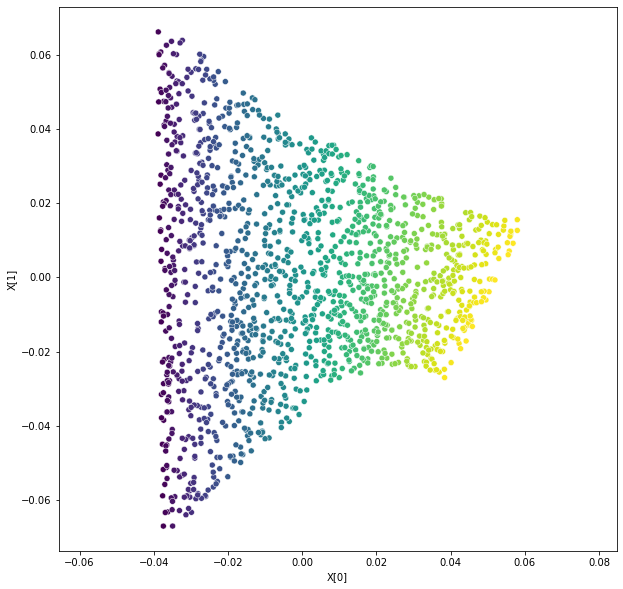

In [35]:
from sklearn.manifold import LocallyLinearEmbedding

lle_standard = apply_manifold_learning(X, LocallyLinearEmbedding(n_components=2, n_neighbors=15, method='standard'))

New shape of X: (1500, 2)



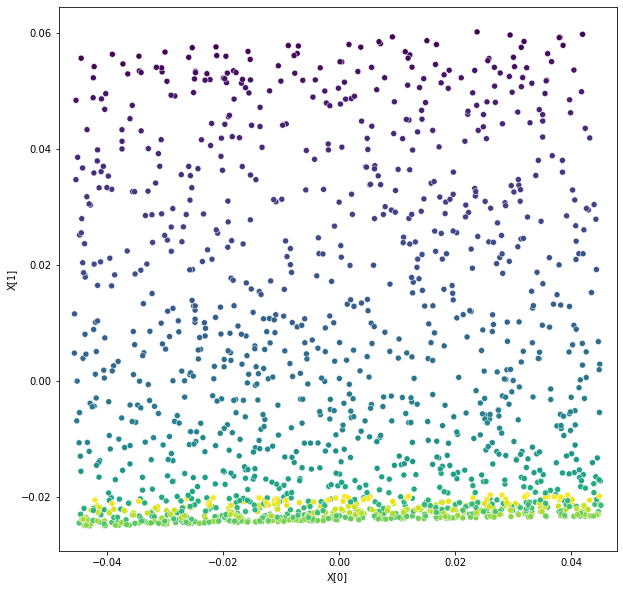

In [36]:
lle_modified = apply_manifold_learning(X, LocallyLinearEmbedding(n_components=2, n_neighbors=15, method='modified'))

New shape of X: (1500, 2)



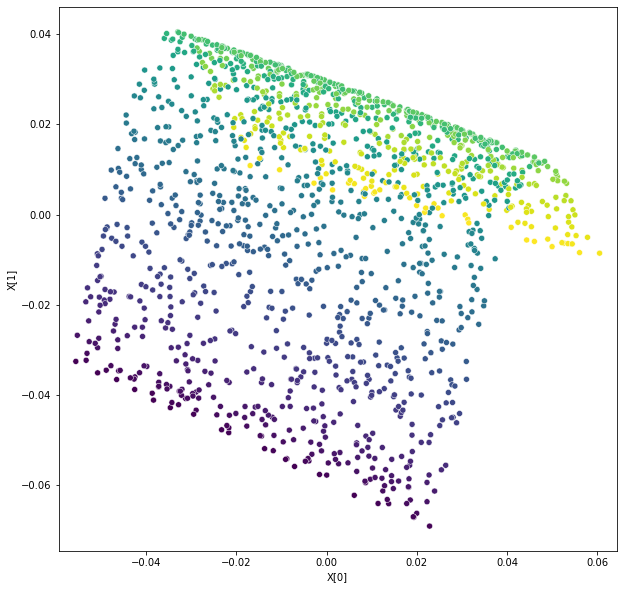

In [37]:
lle_hessian = apply_manifold_learning(X, LocallyLinearEmbedding(n_components=2, n_neighbors=15, method='hessian'))

## Spectral Embeddings
Builds a graph where each point serves as a node. Then fits a smooth function in a lower dim space to pass through all nodes. Often implemented using technique called Laplacian Eigenmaps.

New shape of X: (1500, 2)



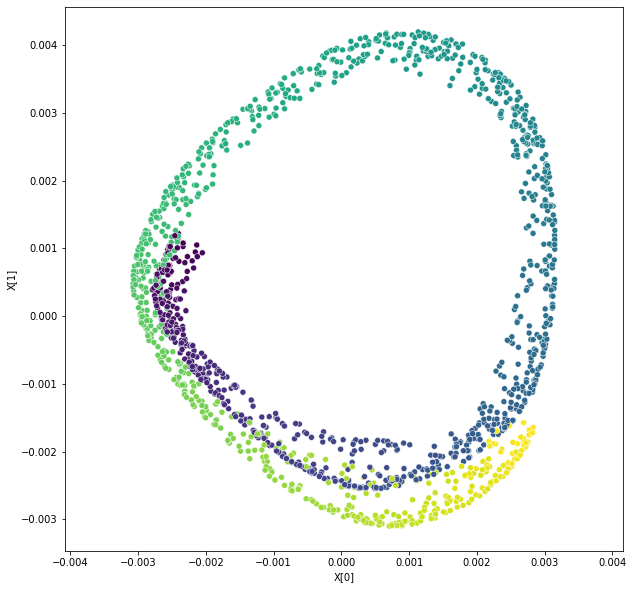

In [38]:
from sklearn.manifold import SpectralEmbedding
spectral_embedding = apply_manifold_learning(X, \
    SpectralEmbedding(n_components=2, random_state=0, eigen_solver='arpack'))

## t-distributed Stochastic Neighbor Embedding (t-SNE)
Aims to keep similar points together and dissimilar points apart. First fits a student-t dist to the data.
Widely used in visualizing clusters.

C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


New shape of X: (1500, 2)



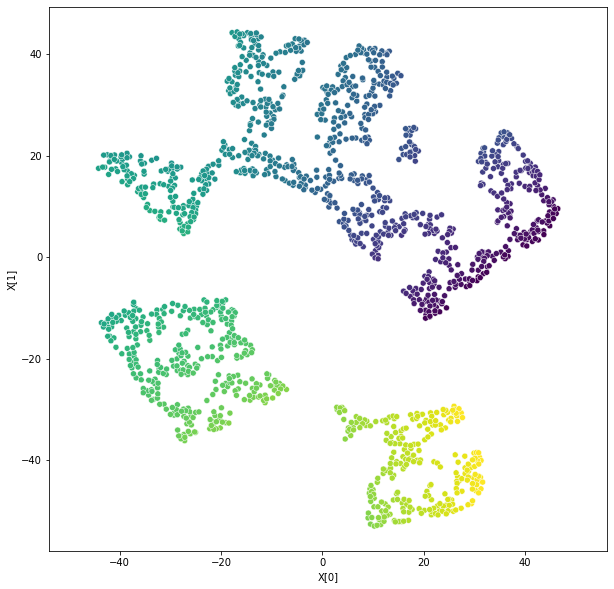

In [39]:
from sklearn.manifold import TSNE
tsne = apply_manifold_learning(X, TSNE(n_components=2, random_state=0, init='pca'))

## Kernel PCA
First kernel trick is applied to go to even higher (infinite) number of dimensions. Then perform PCA to come down to very low-dim space.

In [41]:
import pylab as pl
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

New shape of X: (1500, 2)



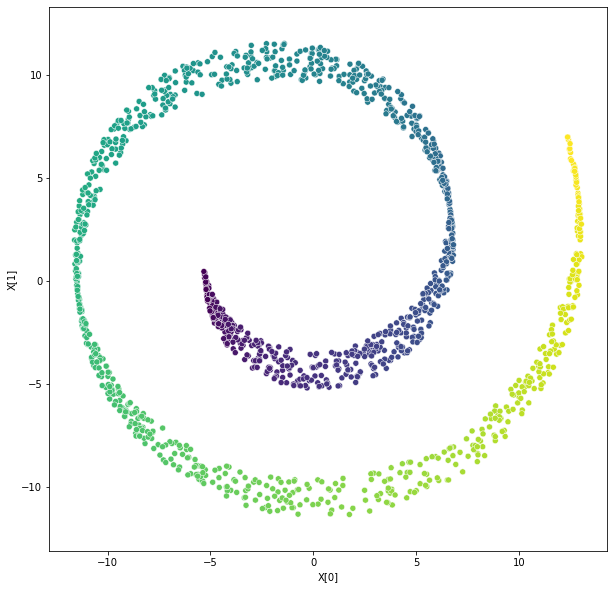

In [42]:
linear_pca = apply_manifold_learning(X, PCA(n_components=2))

New shape of X: (1500, 2)



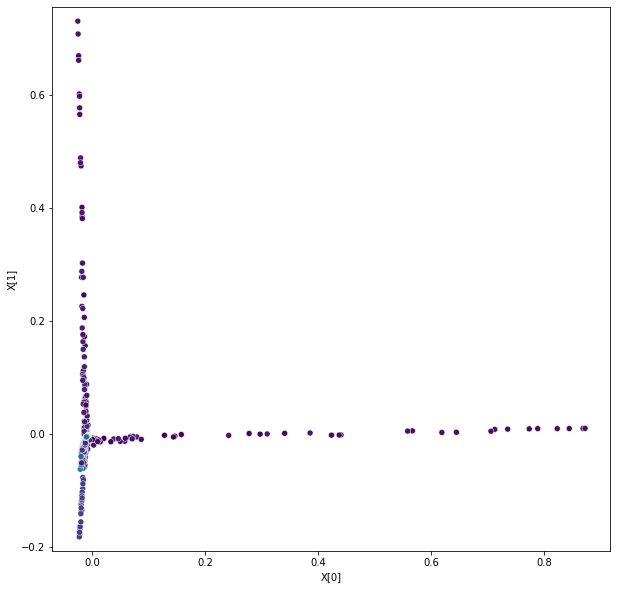

In [45]:
kernel_pca = apply_manifold_learning(X, KernelPCA(n_components=2, kernel='rbf', gamma=1))

In [46]:
X, y = make_circles(n_samples=1000, factor=.3, noise=.05)

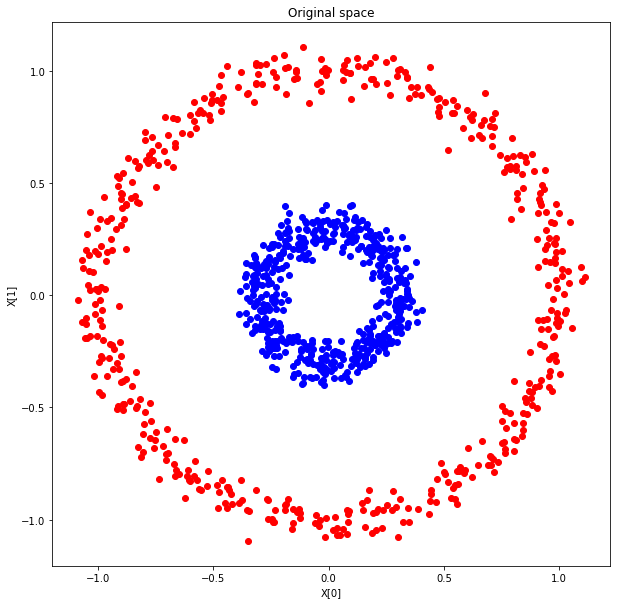

In [47]:
pl.figure(figsize=(10, 10))
pl.title('Original space')

pl.plot( X[y == 0, 0], X[y == 0, 1], "ro")
pl.plot( X[y == 1, 0], X[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

In [48]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

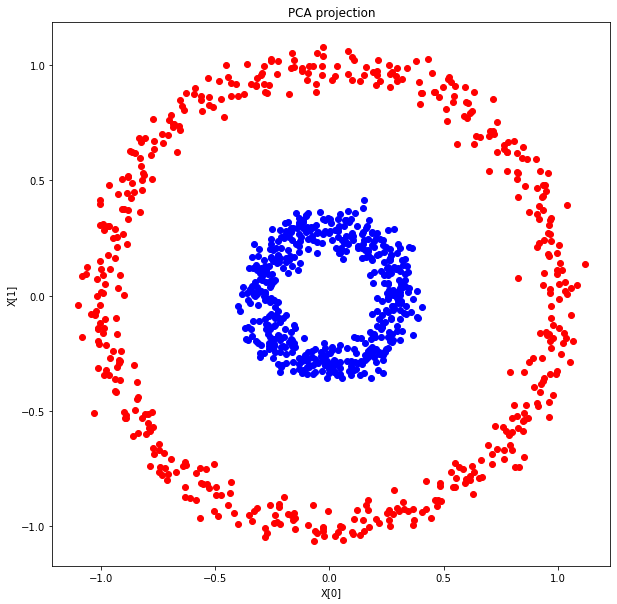

In [49]:
pl.figure(figsize=(10, 10))
pl.title('PCA projection')

pl.plot( X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot( X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

In [50]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=3)
X_new = kpca.fit_transform(X)

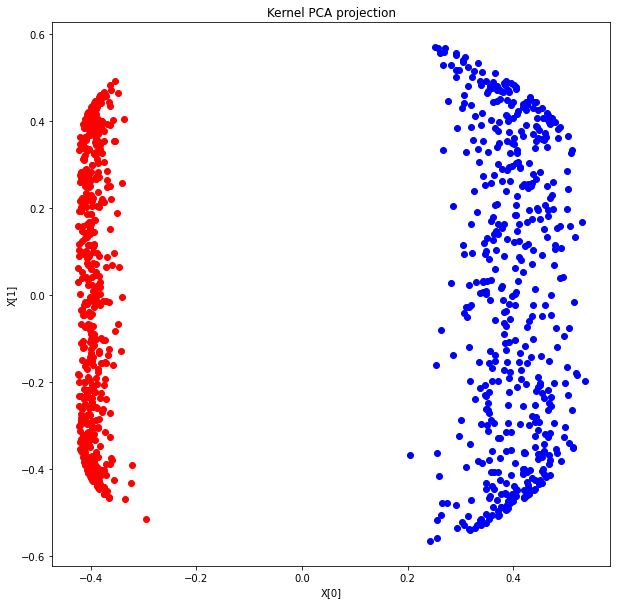

In [51]:
pl.figure(figsize=(10, 10))
pl.title('Kernel PCA projection')

pl.plot( X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot( X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

In [52]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

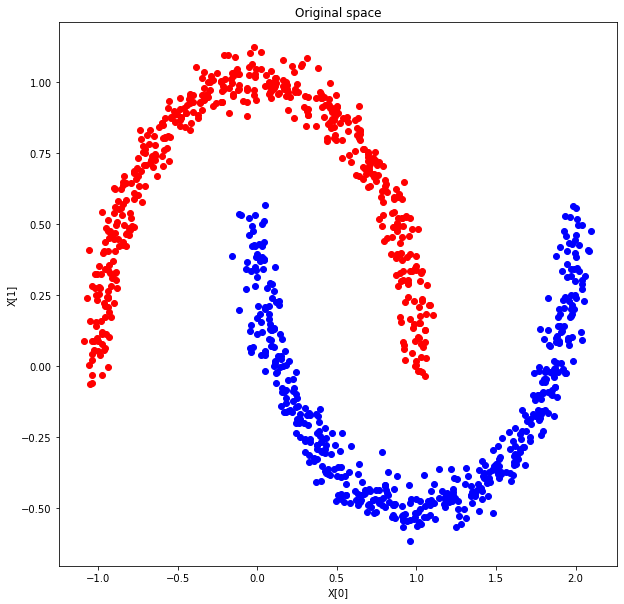

In [53]:
pl.figure(figsize=(10, 10))
pl.title('Original space')

pl.plot( X[y == 0, 0], X[y == 0, 1], "ro")
pl.plot( X[y == 1, 0], X[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

In [54]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

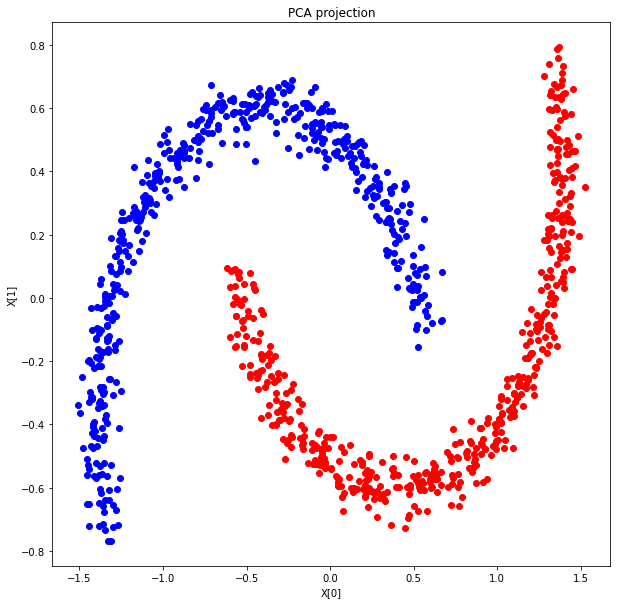

In [55]:
pl.figure(figsize=(10, 10))
pl.title('PCA projection')

pl.plot( X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot( X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

In [56]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_new = kpca.fit_transform(X)

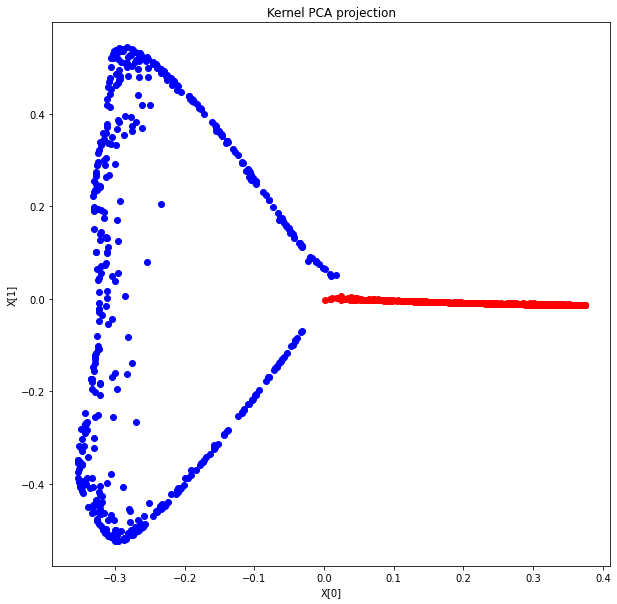

In [57]:
pl.figure(figsize=(10, 10))
pl.title('Kernel PCA projection')

pl.plot( X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot( X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');